<a href="https://colab.research.google.com/github/emcarthur123/Miscellanies-Notebooks/blob/main/Lecture_4_3_body_orbits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **This code uses the [REBOUND](https://rebound.hanno-rein.de/) code by Hanno Rein.  


#Section 1:
Start with a binary

The "natural" units of REBOUND are tied to our solar system.  A solar mass is 1, the Earth's semimajor axis is 1, and the orbital period of the Earth about the Sun is 2pi.

The first thing we will do is install REBOUND.


In [ ]:
!pip install rebound

Next, we will import rebound and start adding particles to the simulation.  This first command places a solar-mass particle at the origin.

In [ ]:
import rebound
from google.colab import files #this lets you download files to make an animation
sim = rebound.Simulation()
sim.add(m=1.)

Let's add a particle with a mass a factor $f < 1$ lower than the primary.  Let's put it on a circular orbit.

In [ ]:
f = 0.1

In [ ]:
sim.add(m=f, a=1)

REBOUND works in inertial frames.  The way we've set things up is in a "heliocentric" frame, which is not inertial.  So we need to move to the barycentric, or center-of-mass, frame, which is inertial.

In [ ]:
sim.move_to_com()

What do the initial conditions look like?

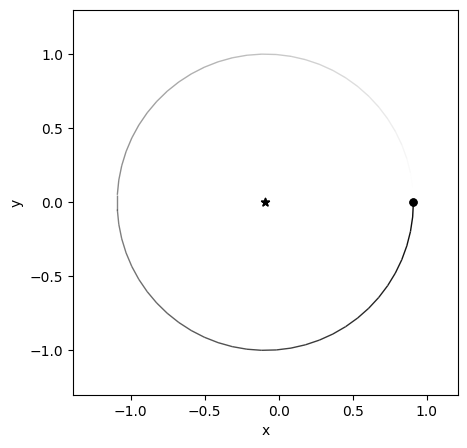

In [ ]:
%matplotlib inline
op = rebound.OrbitPlot(sim)

Let's add a test particle and then see what things look like.  For fun, I'm going to put it on a circular orbit with a semi-major axis only just larger than that of the secondary

In [ ]:
sim.add(m=0,a=1.1)

Updating the plot now.


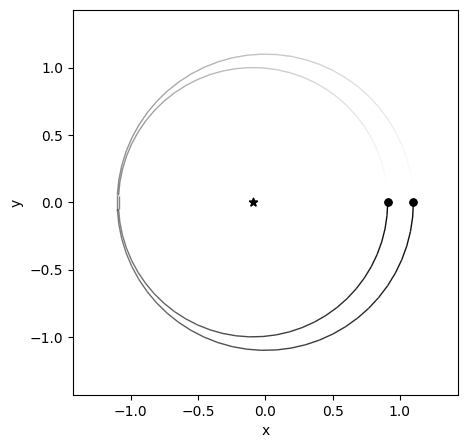

In [ ]:
op = rebound.OrbitPlot(sim)

**How do the orbits compare?**

In [ ]:
for i in range(10):
    sim.integrate(sim.t+0.31)
    op.update()
    op.fig.savefig("out_%02d.png"%i)
    files.download("out_%02d.png"%i)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Take a look at your files.  What do you see?  Is angular momentum conserved? Congratulations on your fun osculating elements!

Free up our memory, and start again

In [ ]:
del sim


# Section 2:
Let's start with the test particle on an inclined orbit.


In [ ]:
sim = rebound.Simulation()

Specify a primary

In [ ]:
sim.add(m=1)

Add a secondary

In [ ]:
sim.add(m=f, a=1)

Add your test particle.

In [ ]:
sim.add(m=0,a=1.1,inc=1.)

Is the inclination given in degrees or radians?

Other instantaneous orbit projections.  


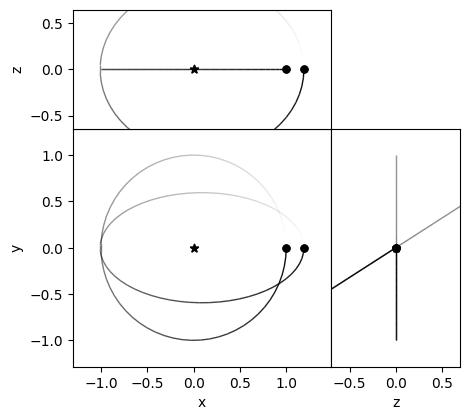

In [ ]:
ops = rebound.OrbitPlotSet(sim)


Like we did above, let's make plots of the orbits as a function of time, and also track the orbital elements of the test particle.

In [ ]:
import numpy as np
Nout = 10
es = np.zeros(Nout)
semimajors = np.zeros(Nout)
incs = np.zeros(Nout)
times = np.zeros(Nout)

for i in range(Nout):
    sim.integrate(sim.t+0.31)
    es[i]=sim.particles[2].e
    semimajors[i]=sim.particles[2].a
    incs[i]=sim.particles[2].inc
    times[i] = sim.t
    ops.update()
    ops.fig.savefig("outinc_%02d.png"%i)
    files.download("outinc_%02d.png"%i)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

You can make plots of the orbital elements as a function of time.

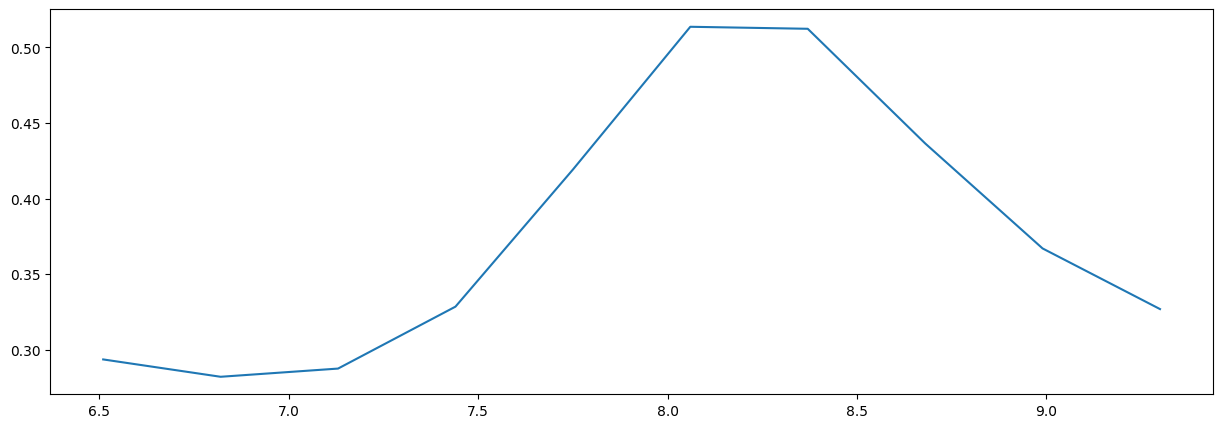

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)
plt.plot(times, es)

**How do the true anomaly, omega, Omega change with time?**

**More things to try out: vary the initial conditions of the test particle, and see how the orbit of the test particle evolves with time.**

**Exercise for you:** write a function that lets you determine the z component of angular momentum per unit mass of the test particle (or any other particle in the simulation).  Output that component of angular momentum each time you make a snapshot above.  Is the z component of angular momentum conserved or not? [This will end up in HW 2, so you can try it out here or wait till you do the HW to make the function]


